In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('boston Interpolated summary lag 6.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,180.147647,5.93,49396,4459.312,4.7,287293.8040,1204.93445,40.50%,226272.0000,0.50%,1479,0.02,197.4
1,4/1/2005,180.012971,5.86,49726,4460.729,4.4,287317.3738,1217.46160,40.50%,227099.6667,0.47%,1235,0.32,198.6
2,5/1/2005,180.811955,5.72,50056,4462.145,4.3,287340.9436,1229.98875,40.50%,227927.3333,0.43%,1616,0.42,198.6
3,6/1/2005,180.437704,5.58,50386,4463.562,4.8,287364.5134,1242.51590,40.50%,228755.0000,0.40%,1983,0.32,198.8
4,7/1/2005,180.626980,5.70,50717,4464.978,4.6,287388.0832,1255.04305,40.57%,229226.6667,0.43%,1632,1.06,198.8
5,8/1/2005,179.543747,5.82,51047,4466.395,4.3,287411.6530,1267.57020,40.63%,229698.3333,0.47%,1222,0.93,207.2
6,9/1/2005,180.049947,5.77,51377,4467.811,4.7,287435.2228,1280.09735,40.70%,230170.0000,0.50%,1252,1.23,207.2
7,10/1/2005,179.342073,6.07,51707,4469.228,4.2,287458.7926,1292.62450,40.57%,231436.3333,0.53%,1235,1.15,203.2
8,11/1/2005,178.325591,6.33,52038,4470.644,4.4,287482.3624,1305.15165,40.43%,232702.6667,0.57%,1234,0.94,203.2
9,12/1/2005,176.495037,6.27,52368,4472.061,4.2,287505.9322,1317.67880,40.30%,233969.0000,0.60%,1714,0.73,204.9


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,180.147647,5.93,49396,4459.312,4.7,287293.8040,1204.93445,226272.0000,1479,0.02,197.4,40.50,0.50
1,4/1/2005,180.012971,5.86,49726,4460.729,4.4,287317.3738,1217.46160,227099.6667,1235,0.32,198.6,40.50,0.47
2,5/1/2005,180.811955,5.72,50056,4462.145,4.3,287340.9436,1229.98875,227927.3333,1616,0.42,198.6,40.50,0.43
3,6/1/2005,180.437704,5.58,50386,4463.562,4.8,287364.5134,1242.51590,228755.0000,1983,0.32,198.8,40.50,0.40
4,7/1/2005,180.626980,5.70,50717,4464.978,4.6,287388.0832,1255.04305,229226.6667,1632,1.06,198.8,40.57,0.43


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,49396,4459.312,4.7,287293.8040,1204.934450,226272.0000,1479,0.02,197.400,40.50,0.50
1,5.86,49726,4460.729,4.4,287317.3738,1217.461600,227099.6667,1235,0.32,198.600,40.50,0.47
2,5.72,50056,4462.145,4.3,287340.9436,1229.988750,227927.3333,1616,0.42,198.600,40.50,0.43
3,5.58,50386,4463.562,4.8,287364.5134,1242.515900,228755.0000,1983,0.32,198.800,40.50,0.40
4,5.70,50717,4464.978,4.6,287388.0832,1255.043050,229226.6667,1632,1.06,198.800,40.57,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
143,4.17,75338,4843.252,3.8,440014.3760,701.030317,240431.6667,695,1.65,247.615,36.77,1.40
144,4.20,75664,4844.733,3.5,442233.6170,697.847475,240782.0000,1659,2.57,247.615,36.90,1.40
145,4.05,75990,4846.213,3.2,444452.8580,694.664633,240929.0000,717,3.28,248.025,36.90,1.37
146,4.01,76316,4847.693,3.4,446672.0990,691.481792,241076.0000,1662,3.30,248.025,36.90,1.33


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),148.0,4.804324,1.043601,3.35000,3.935000,4.475000,5.920000,6.7600
Personal_Income,148.0,61682.581081,7034.849883,49396.00000,56126.500000,61041.000000,66770.750000,76642.0000
Resident_Population,148.0,4645.432473,120.216587,4459.31200,4554.782750,4623.441000,4758.055250,4849.1740
Unemployment_Rate,148.0,5.367568,1.370099,3.00000,4.275000,5.150000,6.400000,8.6000
GDP,148.0,351978.586976,47688.348230,287293.80400,309678.275625,345580.945400,389386.871000,448891.3400
Crime_Rate,148.0,954.808665,217.549935,688.29895,757.581406,881.642538,1139.327256,1339.4548
Median_Debt,148.0,240420.635135,4125.549316,226272.00000,238395.916675,240002.000000,243785.833300,246863.0000
New_Structures,148.0,878.831081,419.014675,237.00000,574.500000,802.500000,1110.750000,2127.0000
Economic_Conditions_Index,148.0,1.294054,1.748122,-5.21000,0.872500,1.605000,2.462500,4.0200
CPI all items less shelter,148.0,228.875770,14.334579,197.40000,217.192250,235.066000,241.299500,248.0250


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.078645,-1.746531,-1.548210,-0.487240,-1.356406,1.149740,-3.429515,1.432334,-0.728813,-2.195793,0.380285,-1.611785
1,1.011570,-1.699621,-1.536423,-0.706202,-1.355912,1.207323,-3.228896,0.850015,-0.557200,-2.112079,0.380285,-1.636368
2,0.877419,-1.652712,-1.524644,-0.779190,-1.355418,1.264905,-3.028276,1.759291,-0.499996,-2.112079,0.380285,-1.669147
3,0.743268,-1.605803,-1.512857,-0.414253,-1.354924,1.322488,-2.827656,2.635156,-0.557200,-2.098127,0.380285,-1.693730
4,0.858255,-1.558751,-1.501078,-0.560228,-1.354429,1.380071,-2.713328,1.797476,-0.133889,-2.098127,0.419254,-1.669147
...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.607822,1.941110,1.645526,-1.144127,1.846065,-1.166529,0.002674,-0.438722,0.203616,1.307274,-1.696199,-0.874273
144,-0.579076,1.987451,1.657845,-1.363089,1.892601,-1.181160,0.087592,1.861913,0.729895,1.307274,-1.623828,-0.874273
145,-0.722809,2.033792,1.670157,-1.582051,1.939138,-1.195790,0.123224,-0.386218,1.136046,1.335877,-1.623828,-0.898856
146,-0.761138,2.080132,1.682468,-1.436077,1.985674,-1.210420,0.158855,1.869073,1.147487,1.335877,-1.623828,-0.931635


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

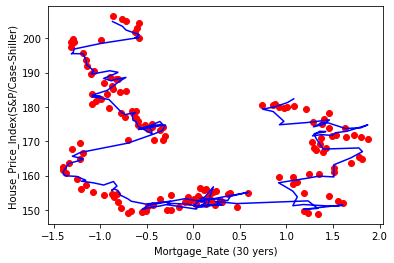

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.83
Accuracy: 98.91 %.


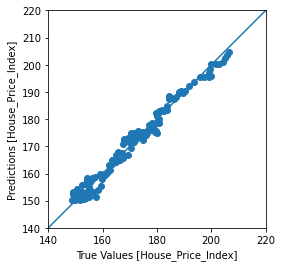

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.980283221994777

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,3.465242
1,-25.352575
2,-18.269128
3,1.991967
4,50.290530
5,0.501299
6,2.369482
7,-0.181681
8,1.751316
9,-1.970668


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[182.35716667 181.28024408 180.03070574 179.35628031 178.65817961
 175.79777784 174.80513088 175.42643639 176.22255607 174.95531139
 174.1966262  175.4202213  175.3171817  173.70231026 173.8380058
 173.89037795 174.76588093 172.86971753 172.48714417 171.67977326
 171.93394417 171.55232768 172.90098403 172.80663531 172.2178484
 170.83679335 167.71303212 168.03814749 166.97907565 165.15056335
 163.1451114  159.61278297 159.82199599 159.29240198 157.89709004
 155.4611784  153.80759607 151.20824587 151.54999673 151.12815229
 151.11746002 151.42204613 150.1610659  150.41409724 152.61479169
 151.83103342 152.45058477 151.36963604 151.44657917 151.12556011
 152.43518661 155.11089552 153.961621   152.69574531 153.14879912
 153.17963182 153.20645711 153.66043644 156.72150979 153.74235209
 151.40154375 151.63452696 150.77568428 151.68050897 151.8736681
 151.11354683 150.8404348  150.15192476 151.3079894  153.24818748
 153.03746698 152.2386201  150.47212628 150.22713362 151.00461145
 151.50153308

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,182.357167
1,181.280244
2,180.030706
3,179.356280
4,178.658180
...,...
143,200.470999
144,201.048056
145,202.420684
146,203.507700


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,1.404440,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
Personal_Income,-1.746531,-1.699621,-1.652712,-1.605803,-1.558751,-1.511842,-1.464933,-1.418023,-1.370972,-1.324063,...,1.742243,1.780481,1.818577,1.856673,1.894769,1.941110,1.987451,2.033792,2.080132,2.126473
Resident_Population,-1.548210,-1.536423,-1.524644,-1.512857,-1.501078,-1.489291,-1.477512,-1.465725,-1.453946,-1.442159,...,1.542512,1.565188,1.587863,1.610539,1.633215,1.645526,1.657845,1.670157,1.682468,1.694787
Unemployment_Rate,-0.487240,-0.706202,-0.779190,-0.414253,-0.560228,-0.779190,-0.487240,-0.852177,-0.706202,-0.852177,...,-1.436077,-1.655039,-1.728026,-1.728026,-1.144127,-1.144127,-1.363089,-1.582051,-1.436077,-1.217114
GDP,-1.356406,-1.355912,-1.355418,-1.354924,-1.354429,-1.353935,-1.353441,-1.352947,-1.352452,-1.351958,...,1.675557,1.706550,1.737543,1.768536,1.799529,1.846065,1.892601,1.939138,1.985674,2.032210
Crime_Rate,1.149740,1.207323,1.264905,1.322488,1.380071,1.437654,1.495237,1.552820,1.610403,1.667985,...,-1.137961,-1.137730,-1.137499,-1.137268,-1.151899,-1.166529,-1.181160,-1.195790,-1.210420,-1.225051
Median_Debt,-3.429515,-3.228896,-3.028276,-2.827656,-2.713328,-2.599000,-2.484672,-2.177723,-1.870774,-1.563825,...,-0.339745,-0.282217,-0.224690,-0.167162,-0.082244,0.002674,0.087592,0.123224,0.158855,0.194487
New_Structures,1.432334,0.850015,1.759291,2.635156,1.797476,0.818990,0.890587,0.850015,0.847629,1.993173,...,2.320131,0.086319,0.375092,0.048134,-0.422016,-0.438722,1.861913,-0.386218,1.869073,0.702049
Economic_Conditions_Index,-0.728813,-0.557200,-0.499996,-0.557200,-0.133889,-0.208254,-0.036642,-0.082405,-0.202534,-0.322663,...,0.878627,0.867186,0.804261,0.689852,0.232218,0.203616,0.729895,1.136046,1.147487,0.981594
CPI all items less shelter,-2.195793,-2.112079,-2.112079,-2.098127,-2.098127,-1.512132,-1.512132,-1.791177,-1.791177,-1.672583,...,1.032903,1.025439,1.025439,1.277626,1.277626,1.307274,1.307274,1.335877,1.335877,1.266604


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,138,139,140,141,142,143,144,145,146,147
0,Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
1,Personal_Income,-1.746531,-1.699621,-1.652712,-1.605803,-1.558751,-1.511842,-1.464933,-1.418023,-1.370972,...,1.742243,1.780481,1.818577,1.856673,1.894769,1.941110,1.987451,2.033792,2.080132,2.126473
2,Resident_Population,-1.548210,-1.536423,-1.524644,-1.512857,-1.501078,-1.489291,-1.477512,-1.465725,-1.453946,...,1.542512,1.565188,1.587863,1.610539,1.633215,1.645526,1.657845,1.670157,1.682468,1.694787
3,Unemployment_Rate,-0.487240,-0.706202,-0.779190,-0.414253,-0.560228,-0.779190,-0.487240,-0.852177,-0.706202,...,-1.436077,-1.655039,-1.728026,-1.728026,-1.144127,-1.144127,-1.363089,-1.582051,-1.436077,-1.217114
4,GDP,-1.356406,-1.355912,-1.355418,-1.354924,-1.354429,-1.353935,-1.353441,-1.352947,-1.352452,...,1.675557,1.706550,1.737543,1.768536,1.799529,1.846065,1.892601,1.939138,1.985674,2.032210
5,Crime_Rate,1.149740,1.207323,1.264905,1.322488,1.380071,1.437654,1.495237,1.552820,1.610403,...,-1.137961,-1.137730,-1.137499,-1.137268,-1.151899,-1.166529,-1.181160,-1.195790,-1.210420,-1.225051
6,Median_Debt,-3.429515,-3.228896,-3.028276,-2.827656,-2.713328,-2.599000,-2.484672,-2.177723,-1.870774,...,-0.339745,-0.282217,-0.224690,-0.167162,-0.082244,0.002674,0.087592,0.123224,0.158855,0.194487
7,New_Structures,1.432334,0.850015,1.759291,2.635156,1.797476,0.818990,0.890587,0.850015,0.847629,...,2.320131,0.086319,0.375092,0.048134,-0.422016,-0.438722,1.861913,-0.386218,1.869073,0.702049
8,Economic_Conditions_Index,-0.728813,-0.557200,-0.499996,-0.557200,-0.133889,-0.208254,-0.036642,-0.082405,-0.202534,...,0.878627,0.867186,0.804261,0.689852,0.232218,0.203616,0.729895,1.136046,1.147487,0.981594
9,CPI all items less shelter,-2.195793,-2.112079,-2.112079,-2.098127,-2.098127,-1.512132,-1.512132,-1.791177,-1.791177,...,1.032903,1.025439,1.025439,1.277626,1.277626,1.307274,1.307274,1.335877,1.335877,1.266604


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),3.465242
1,Personal_Income,-25.352575
2,Resident_Population,-18.269128
3,Unemployment_Rate,1.991967
4,GDP,50.290530
5,Crime_Rate,0.501299
6,Median_Debt,2.369482
7,New_Structures,-0.181681
8,Economic_Conditions_Index,1.751316
9,CPI all items less shelter,-1.970668


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

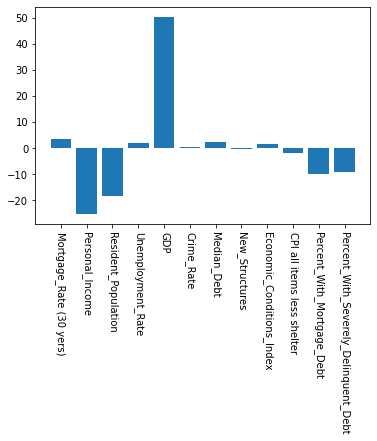

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,7/1/2017,201.825606,3.97,76968.00000,4850.654000,3.7,451110.5810,685.116108,36.73%,241480.0000,1.27%,1875,2.95,247.032
1,8/1/2017,202.915818,3.88,77293.00000,4852.134000,3.5,453329.8220,681.933267,36.57%,241737.0000,1.23%,1032,2.60,250.226
2,9/1/2017,204.398359,3.81,77619.00000,4853.615000,3.3,455549.0630,678.750425,36.40%,241994.0000,1.20%,1245,2.50,250.226
3,10/1/2017,205.184641,3.90,77945.00000,4855.095000,3.0,457768.3040,675.567583,36.27%,242478.3333,1.17%,1227,3.15,250.374
4,11/1/2017,205.661339,3.92,78271.00000,4856.575000,2.9,459987.5450,672.384742,36.13%,242962.6667,1.13%,989,2.47,250.374
5,12/1/2017,206.398537,3.95,78597.00000,4858.056000,2.9,462206.7860,669.201900,36.00%,243447.0000,1.10%,2129,2.42,252.932
6,1/1/2018,207.867448,4.03,78923.00000,4859.536000,3.6,464426.0270,669.201900,36.20%,243195.0000,1.10%,1410,2.53,252.932
7,2018/2/1,210.636170,4.33,79137.58333,4860.659583,3.5,466108.9036,665.306000,36.40%,242943.0000,1.10%,714,2.05,254.992
8,2018/3/1,210.815006,4.44,79352.16667,4861.783167,3.3,467791.7802,661.410100,36.60%,242691.0000,1.10%,1174,2.40,254.992
9,2018/4/1,212.130453,4.47,79566.75000,4862.906750,2.9,469474.6568,657.514200,36.23%,242388.3333,1.07%,606,1.76,253.770


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,7/1/2017,201.825606,3.97,76968.0,4850.654,3.7,451110.581,685.116108,241480.0000,1875,2.95,247.032,36.73,1.27
1,8/1/2017,202.915818,3.88,77293.0,4852.134,3.5,453329.822,681.933267,241737.0000,1032,2.60,250.226,36.57,1.23
2,9/1/2017,204.398359,3.81,77619.0,4853.615,3.3,455549.063,678.750425,241994.0000,1245,2.50,250.226,36.40,1.20
3,10/1/2017,205.184641,3.90,77945.0,4855.095,3.0,457768.304,675.567583,242478.3333,1227,3.15,250.374,36.27,1.17
4,11/1/2017,205.661339,3.92,78271.0,4856.575,2.9,459987.545,672.384742,242962.6667,989,2.47,250.374,36.13,1.13


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3.97,76968.00000,4850.654000,3.7,451110.5810,685.116108,241480.0000,1875,2.95,247.032,36.73,1.27
1,3.88,77293.00000,4852.134000,3.5,453329.8220,681.933267,241737.0000,1032,2.60,250.226,36.57,1.23
2,3.81,77619.00000,4853.615000,3.3,455549.0630,678.750425,241994.0000,1245,2.50,250.226,36.40,1.20
3,3.90,77945.00000,4855.095000,3.0,457768.3040,675.567583,242478.3333,1227,3.15,250.374,36.27,1.17
4,3.92,78271.00000,4856.575000,2.9,459987.5450,672.384742,242962.6667,989,2.47,250.374,36.13,1.13
5,3.95,78597.00000,4858.056000,2.9,462206.7860,669.201900,243447.0000,2129,2.42,252.932,36.00,1.10
6,4.03,78923.00000,4859.536000,3.6,464426.0270,669.201900,243195.0000,1410,2.53,252.932,36.20,1.10
7,4.33,79137.58333,4860.659583,3.5,466108.9036,665.306000,242943.0000,714,2.05,254.992,36.40,1.10
8,4.44,79352.16667,4861.783167,3.3,467791.7802,661.410100,242691.0000,1174,2.40,254.992,36.60,1.10
9,4.47,79566.75000,4862.906750,2.9,469474.6568,657.514200,242388.3333,606,1.76,253.770,36.23,1.07


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.155000,0.298374,3.8100,3.915000,4.0000,4.447500,4.590000
Personal_Income,12.0,78620.812500,1004.712893,76968.0000,77863.500000,78760.0000,79405.812503,79995.916670
Resident_Population,12.0,4858.349896,4.786061,4850.6540,4854.725000,4858.7960,4862.064063,4865.153917
Unemployment_Rate,12.0,3.250000,0.296954,2.9000,2.975000,3.3000,3.500000,3.700000
GDP,12.0,462645.950983,7172.661395,451110.5810,457213.493750,463316.4065,468212.499350,472840.409900
Crime_Rate,12.0,668.310577,11.210527,649.7224,660.436125,669.2019,676.363294,685.116108
Median_Debt,12.0,242432.083333,628.748929,241480.0000,241941.250000,242433.3333,242947.916675,243447.000000
New_Structures,12.0,1333.833333,501.775907,606.0000,1021.250000,1236.0000,1566.000000,2142.000000
Economic_Conditions_Index,12.0,2.296667,0.583879,1.0000,1.977500,2.4450,2.547500,3.150000
CPI all items less shelter,12.0,252.122833,2.438822,247.0320,250.337000,252.9320,253.791000,254.992000


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.799467,2.172814,1.707098,-1.217114,2.078747,-1.239681,0.256782,2.377408,0.947272,1.266604,-1.718467,-0.980802
1,-0.885706,2.219012,1.719409,-1.363089,2.125283,-1.254312,0.319076,0.365545,0.747057,1.489421,-1.807538,-1.013580
2,-0.952782,2.265353,1.731729,-1.509064,2.171819,-1.268942,0.381371,0.873881,0.689852,1.489421,-1.902177,-1.038164
3,-0.866542,2.311694,1.744040,-1.728026,2.218356,-1.283572,0.498769,0.830923,1.061680,1.499746,-1.974548,-1.062748
4,-0.847378,2.358035,1.756351,-1.801014,2.264892,-1.298203,0.616168,0.262924,0.672691,1.499746,-2.052485,-1.095526
5,-0.818631,2.404375,1.768670,-1.801014,2.311428,-1.312833,0.733567,2.983592,0.644089,1.678196,-2.124856,-1.120110
6,-0.741973,2.450716,1.780982,-1.290102,2.357965,-1.312833,0.672484,1.267662,0.707014,1.678196,-2.013517,-1.120110
7,-0.454507,2.481219,1.790328,-1.363089,2.393254,-1.330741,0.611401,-0.393378,0.432433,1.821904,-1.902177,-1.120110
8,-0.349103,2.511722,1.799674,-1.509064,2.428543,-1.348649,0.550318,0.704436,0.632648,1.821904,-1.790837,-1.120110
9,-0.320356,2.542225,1.809021,-1.801014,2.463832,-1.366557,0.476954,-0.651125,0.266541,1.736656,-1.996816,-1.144694


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[207.00184044 208.26509378 209.80313173 212.46607115 214.10165877
 215.46668837 216.8533943  216.80432672 216.59246948 218.81898662
 220.8903517  225.355041  ]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,207.001840
1,208.265094
2,209.803132
3,212.466071
4,214.101659
5,215.466688
6,216.853394
7,216.804327
8,216.592469
9,218.818987
